## Cross Validation
L'apprendimento automatico è un processo iterativo.

Dovrete scegliere quali variabili predittive utilizzare, quali tipi di modelli utilizzare, quali argomenti fornire a tali modelli, ecc. Finora queste scelte sono state fatte in modo guidato dai dati, misurando la qualità del modello con un set di convalida (o di attesa).

Ma questo approccio presenta alcuni svantaggi. Per capirlo, immaginate di avere un set di dati con 5000 righe. In genere si conserva circa il 20% dei dati come set di validazione, ovvero 1000 righe. Ma questo lascia una certa casualità nel determinare i punteggi dei modelli. Cioè, un modello potrebbe andare bene su un insieme di 1000 righe, anche se sarebbe impreciso su un altro insieme di 1000 righe.

All'estremo, si potrebbe immaginare di avere solo una riga di dati nell'insieme di convalida. Se si confrontano modelli alternativi, quello che fa le previsioni migliori su un singolo punto di dati sarà soprattutto una questione di fortuna!

In generale, più grande è l'**insieme di validazione**, minore è la casualità (alias "rumore") nella nostra misura della qualità del modello e maggiore sarà l'affidabilità. Sfortunatamente, è possibile ottenere un set di validazione di grandi dimensioni solo rimuovendo righe dai dati di addestramento, e dataset di addestramento più piccoli significano modelli peggiori!

### Che cos'è la Cross Validation?
Nella **convalida incrociata**, eseguiamo il nostro processo di modellazione su diversi sottoinsiemi di dati per ottenere diverse misure della qualità del modello.

Ad esempio, potremmo iniziare dividendo i dati in 5 parti, ciascuna pari al 20% del dataset completo. In questo caso, diciamo che abbiamo suddiviso i dati in 5 "pieghe".

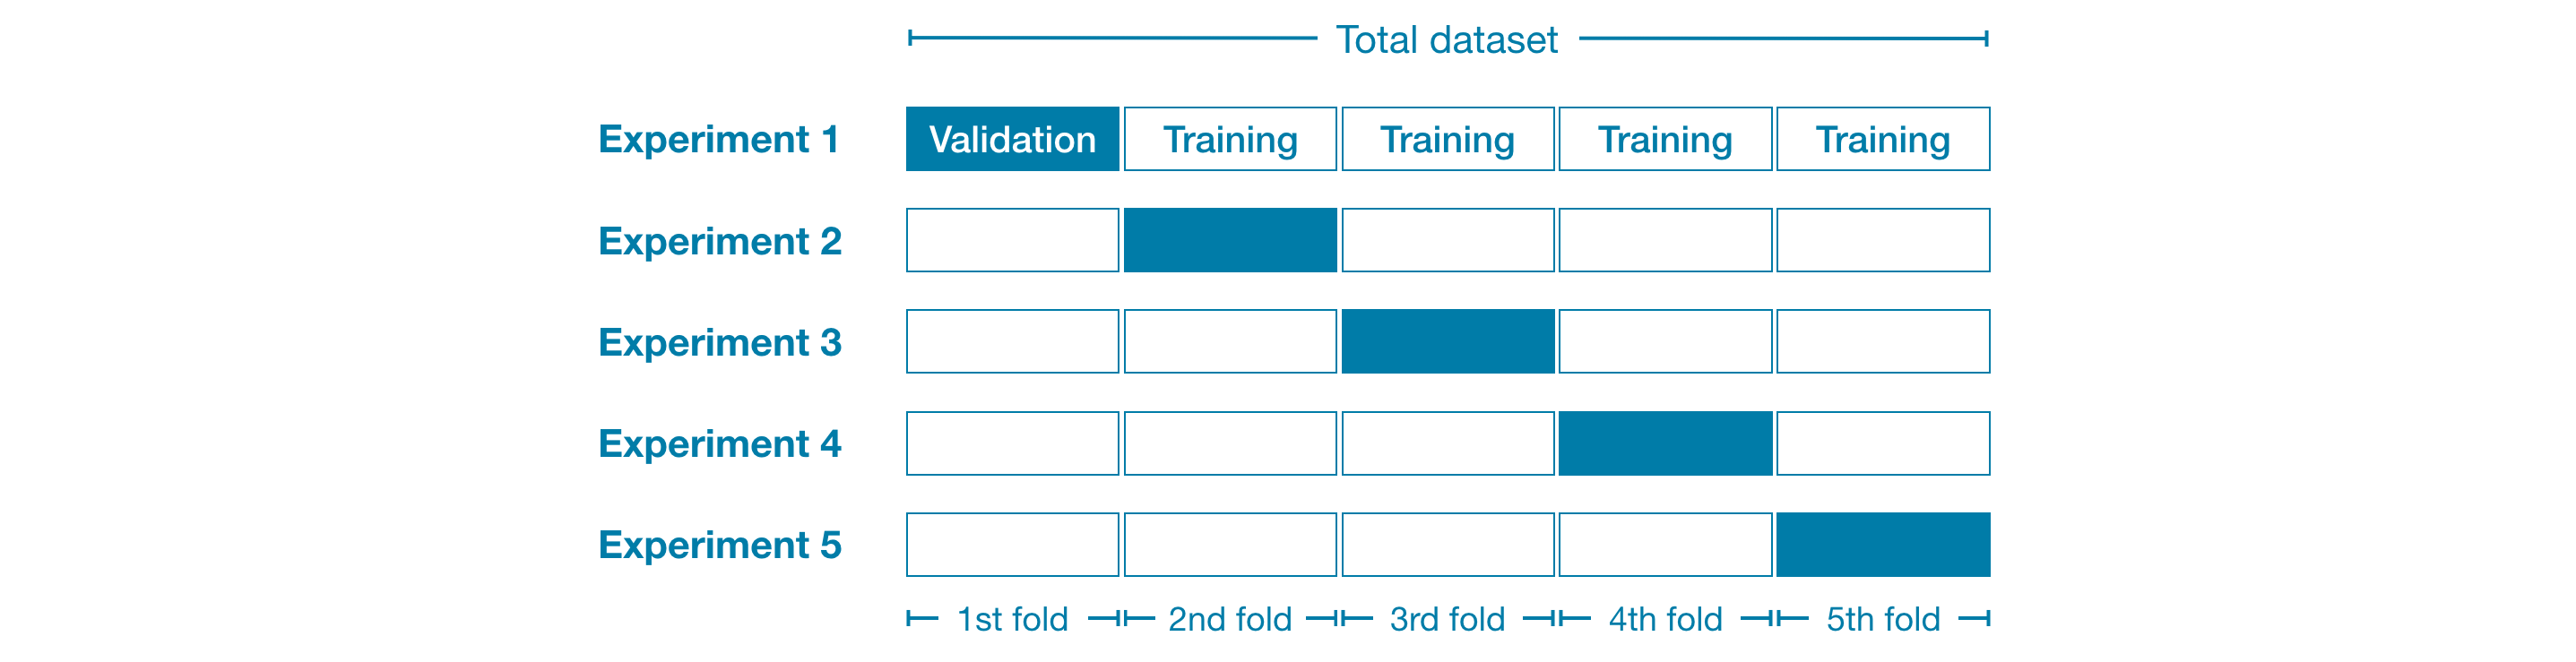

Quindi, eseguiamo un esperimento per ogni piega:

1. Nell'esperimento 1, utilizziamo la prima piega come **set di validazione** (o holdout) e tutto il **resto come dati di addestramento**. In questo modo si ottiene una misura della qualità del modello basata su un set di esclusione del 20%.
2. Nell'Esperimento 2, si escludono i **dati del secondo fold** (e si utilizza tutto tranne il secondo fold per l'addestramento del modello). L'**insieme di dati non utilizzati** viene poi utilizzato per ottenere una seconda stima della qualità del modello.
3. Ripetiamo questo processo, utilizzando ogni fold una volta come **set di holdout**. In questo modo, il 100% dei dati viene utilizzato come holdout a un certo punto e si ottiene una misura della qualità del modello basata su tutte le righe del set di dati (anche se non tutte le righe vengono utilizzate contemporaneamente).

### Quando si dovrebbe usare la Cross Validation?
La **convalida incrociata** fornisce una misura più accurata della qualità del modello, il che è particolarmente importante se si stanno prendendo molte decisioni sulla modellazione. Tuttavia, l'esecuzione può richiedere più tempo, perché stima più modelli (uno per ogni fold).

Alla luce di questi compromessi, quando è opportuno utilizzare ciascun approccio?

Per i _piccoli insiemi di dati_, dove l'onere computazionale aggiuntivo non è un problema, si dovrebbe eseguire la **convalida incrociata**.
Per _insiemi di dati più grandi_, è sufficiente un **singolo set di validazione**. Il codice viene eseguito più velocemente e si può disporre di una quantità di dati tale da rendere superfluo il riutilizzo di alcuni di essi per l'holdout.
Non esiste una soglia semplice per definire un insieme di dati grande o piccolo. Ma se il vostro modello richiede un paio di minuti o meno per essere eseguito, probabilmente vale la pena passare alla convalida incrociata.

In alternativa, si può eseguire la convalida incrociata e vedere se i punteggi di ogni esperimento sembrano vicini. Se ogni esperimento produce gli stessi risultati, probabilmente è sufficiente un singolo set di validazione.

### Esempio
Lavoreremo con gli stessi dati del tutorial precedente. Carichiamo i dati di input in X e i dati di output in y.

In [1]:
import pandas as pd

# Read the data
data = pd.read_csv('D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/melb_data.csv')

# Select subset of predictors
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Select target
y = data.Price

Quindi, definiamo una pipeline che utilizza un imputer per riempire i valori mancanti e un modello random forest per fare previsioni.

È possibile eseguire la convalida incrociata senza pipeline, ma è piuttosto difficile! L'uso di una **pipeline** renderà il codice molto semplice.

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

Otteniamo i punteggi della convalida incrociata con la funzione `cross_val_score()` di scikit-learn. Impostiamo il numero di pieghe con il parametro `cv`.

In [3]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [301628.7893587  303164.4782723  287298.331666   236061.84754543
 260383.45111427]


Il parametro `scoring` sceglie una misura della qualità del modello da riportare: in questo caso, abbiamo scelto un errore assoluto medio (**MAE**) negativo. La documentazione di scikit-learn mostra un elenco di opzioni.

È un po' sorprendente che si specifichi MAE negativo. `Scikit-learn` ha una convenzione per cui tutte le metriche sono definite in modo che un numero alto sia migliore. L'uso di valori negativi permette di essere coerenti con questa convenzione, anche se il MAE negativo è quasi sconosciuto altrove.

In genere vogliamo un'unica misura della qualità del modello per confrontare modelli alternativi. Quindi prendiamo la media degli esperimenti.

In [4]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
277707.3795913405


L'uso della **convalida incrociata** fornisce una misura molto migliore della qualità del modello, con l'ulteriore vantaggio di ripulire il nostro codice: non è più necessario tenere traccia degli insiemi di addestramento e di convalida separati. Quindi, soprattutto per i piccoli insiemi di dati, si tratta di un buon miglioramento!

## Esercizi
In questo esercizio, si sfrutterà quanto appreso per mettere a punto un modello di apprendimento automatico con la convalida incrociata.  
Le domande che seguono vi daranno un feedback sul vostro lavoro. Eseguite la seguente cella per impostare il sistema di feedback.

In [6]:
# Set up code checking
import os
if not os.path.exists("D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/train.csv"):
    os.symlink("D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/train.csv")  
    os.symlink("D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/test.csv") 
from learntools.core import binder
binder.bind(globals())
from learntools.ml_intermediate.ex5 import *
print("Setup Complete")

Setup Complete


Eseguire la cella di codice successiva senza modifiche per caricare i dati di allenamento e di test in `X` e `X_test`. Per semplicità, si tralasciano le variabili categoriche.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
train_data = pd.read_csv('D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/train.csv', index_col='Id')
test_data = pd.read_csv('D:/Users/Alessio/OneDrive/Python/Kaggle/Intermediate Machine Learning/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

Utilizzare la cella di codice successiva per stampare le prime righe dei dati.

In [14]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

Si è anche imparato a usare le pipeline nella convalida incrociata.  Il codice seguente utilizza la funzione [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) per ottenere l'errore assoluto medio (MAE), mediato su cinque pieghe diverse.  Ricordiamo che abbiamo impostato il numero di fold con il parametro `cv`.

In [16]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 18276.410356164386


### Domanda 1
**Scrivere una funzione utile**

In questo esercizio, si utilizzerà la convalida incrociata per selezionare i parametri di un modello di apprendimento automatico.

Iniziate scrivendo una funzione `get_score()` che riporti il MAE medio (su tre pieghe di convalida incrociata) di una pipeline di apprendimento automatico che utilizza:
- i dati in `X` e `y` per creare le pieghe,
- `SimpleImputer()` (con tutti i parametri lasciati di default) per sostituire i valori mancanti e
- `RandomForestRegressor()` (con `random_state=0`) per adattare un modello di foresta casuale.

Il parametro `n_estimators` fornito a `get_score()` viene utilizzato quando si imposta il numero di alberi nel modello della foresta casuale.  

In [17]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()
# Check your answer
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### Domanda 2
**Test di diversi valori dei parametri**

Ora si utilizzerà la funzione definita nel passaggio 1 per valutare le prestazioni del modello corrispondenti a otto diversi valori del numero di alberi nella foresta casuale: 50, 100, 150, ..., 300, 350, 400.

Memorizzate i risultati in un dizionario Python `results`, dove `results[i]` è il MAE medio restituito da `get_score(i)`.

In [18]:
results = {}
for i in range(1,9):
    results[50*i] = get_score(50*i)

# Check your answer
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Utilizzate la cella successiva per visualizzare i risultati del passo 2. Eseguire il codice senza modifiche,

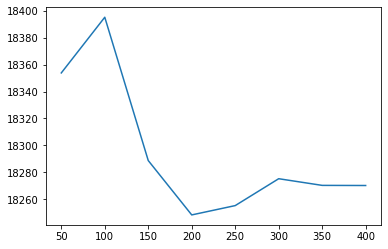

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

### Domanda 3
**Trovare il miglior valore dei parametri**

Dati i risultati, quale valore di `n_estimators` sembra il migliore per il modello della foresta casuale?  Utilizzare la risposta per impostare il valore di `n_estimators_best`.

In [20]:
n_estimators_best = min(results, key=results.get)

# Check your answer
step_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In questo esercizio avete esplorato un metodo per scegliere i parametri appropriati in un modello di apprendimento automatico.  

Se volete saperne di più sull'[ottimizzazione degli iperparametri](https://en.wikipedia.org/wiki/Hyperparameter_optimization), vi invitiamo a iniziare con la **ricerca a griglia**, che è un metodo semplice per determinare la migliore _combinazione_ di parametri per un modello di apprendimento automatico.  Fortunatamente, scikit-learn contiene anche una funzione integrata [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) che può rendere il codice di ricerca a griglia molto efficiente!